In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [30]:
df=df.drop('car_ID',axis=1)
df=df.drop('fuelsystem',axis=1)

In [31]:
df.replace({'fueltype':{'diesel':1,'gas':0}},inplace=True)

df.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)

df.replace({'doornumber':{'two':1,'four':0}},inplace=True)

df.replace({'carbody':{'convertible':4,'sedan':3,'hatchback':2,'wagon':1,'hardtop':0}},inplace=True)

df.replace({'4wd':2,'rwd':1,'fwd':0},inplace=True)

df.replace({'enginelocation':{'rear':1,'front':0}},inplace=True)

df.replace({'cylindernumber':{'twelve':6,'eight':5,'six':4,'five':3,'four':2,'three':1,'two':0}},inplace=True)

df.replace({'enginetype':{'dohcv':6,'rotor':5,'dohc':4,'l':4,'ohcf':2,'ohc':1,'ohcv':3}},inplace=True)



In [32]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,0,0,1,4,0,0,88.6,168.8,...,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,0,0,1,4,0,0,88.6,168.8,...,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,0,0,1,2,0,0,94.5,171.2,...,4,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,0,0,0,3,0,0,99.8,176.6,...,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,0,0,0,3,2,0,99.4,176.6,...,3,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
x=df.drop(['CarName','price'],axis=1)
y=df['price']

In [38]:
print(x)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         0           0           1        4           0   
1            3         0           0           1        4           0   
2            1         0           0           1        2           0   
3            2         0           0           0        3           0   
4            2         0           0           0        3           2   
..         ...       ...         ...         ...      ...         ...   
200         -1         0           0           0        3           0   
201         -1         0           1           0        3           0   
202         -1         0           0           0        3           0   
203         -1         1           1           0        3           0   
204         -1         0           1           0        3           0   

     enginelocation  wheelbase  carlength  carwidth  ...  enginetype  \
0                 0       88.6      168.8      64.1

In [39]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

#Linear Regression

In [54]:
model=LinearRegression()

In [55]:
model.fit(x_train,y_train)

LinearRegression()

In [56]:
train_model=model.predict(x_train)

In [57]:
error_score = metrics.r2_score(y_train, train_model)
print("R squared Error : ", error_score)

R squared Error :  0.9103792063114635


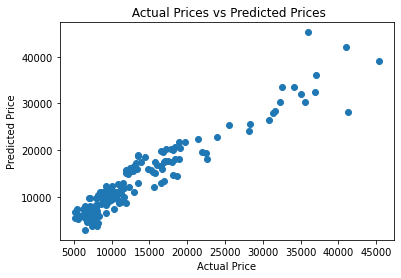

In [59]:
plt.scatter(y_train, train_model)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [60]:
test_model=model.predict(x_test)

In [61]:
error_score = metrics.r2_score(y_test, test_model)
print("R squared Error : ", error_score)

R squared Error :  0.5044952164045646


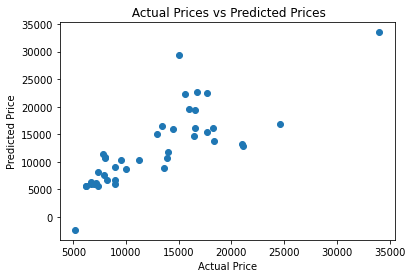

In [62]:
plt.scatter(y_test, test_model)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#Lasso Regression

In [63]:
las_model=Lasso()

In [64]:
las_model.fit(x_train,y_train)

Lasso()

In [65]:
train_model=las_model.predict(x_train)

In [66]:
error_score = metrics.r2_score(y_train, train_model)
print("R squared Error : ", error_score)

R squared Error :  0.9103490730103162


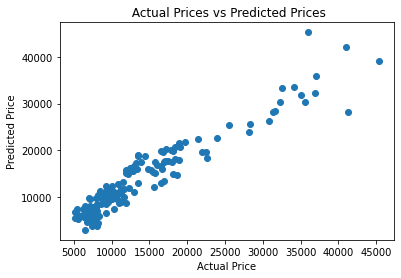

In [67]:
plt.scatter(y_train, train_model)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [68]:
test_model = las_model.predict(x_test)

In [69]:
error_score = metrics.r2_score(y_test, test_model)
print("R squared Error : ", error_score)

R squared Error :  0.517575407100777


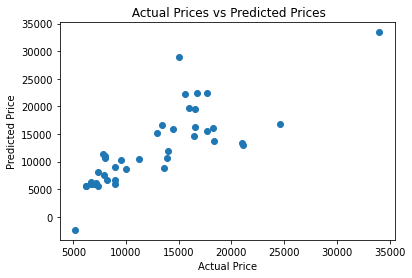

In [70]:
plt.scatter(y_test, test_model)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()